#### **Predicting the Likelihood of Metabolic Syndrome Risk Factors Using Machine Learning**

 **Introduction**

Metabolic syndrome is a cluster of conditions that increases an individual’s risk for heart disease, stroke, type 2 diabetes, liver disease, kidney disease, and various cancers. The diagnosis of metabolic syndrome is based on the presence of **3 or more** of the following 5 risk factors:

1. **High Blood Pressure**:
   - Systolic ≥ 130 mm Hg or Diastolic ≥ 85 mm Hg, or use of medication for hypertension.
   
2. **High Fasting Blood Glucose (Blood Sugar)**:
   - Fasting Blood Glucose (FBG) ≥ 100 mg/dL or the use of medication for elevated blood glucose.

3. **Abnormal Waist Circumference**:
   - **Male**: Waist circumference ≥ 102 cm (40 inches).
   - **Female**: Waist circumference ≥ 88 cm (35 inches).

4. **Low HDL (High-Density Lipoprotein) Cholesterol**:
   - **Male**: HDL < 40 mg/dL.
   - **Female**: HDL < 50 mg/dL.

5. **High Triglyceride Levels**:
   - Triglycerides ≥ 150 mg/dL, or use of medication for elevated triglycerides.


This project focuses on creating a machine learning model to predict the likelihood that an individual will have **3 or more** metabolic syndrome risk factors, providing a **percentage-based probability** for various scenarios based on available input variables such as age, gender, BMI (Body Mass Index), and key health markers like blood pressure and triglycerides. The model is designed to function even when some of the five metabolic syndrome criteria are missing, allowing for probabilistic prediction when only partial data is available.

 **Project Goals**

The key goal of this project is to build a machine learning model that can accurately predict the probability of an individual having **3 or more metabolic syndrome risk factors** based on available health data, even when some variables are missing. The model will give a percentage likelihood of having 3 or more of the five risk factors. This approach can aid clinicians in early diagnosis, especially when complete data is not available, enabling early interventions.

Specifically, the goals are:
1. **Data Exploration and Preprocessing**: Clean and explore the dataset to understand distributions and handle missing values.
2. **Feature Engineering**: Create relevant features to improve predictive power, such as interaction terms between BMI, age, and gender.
3. **Machine Learning Model Development**: Train a classification model that predicts the likelihood of having 3 or more risk factors.
4. **Model Testing and Validation**: Evaluate the model using appropriate metrics like accuracy, precision, and AUC-ROC.
5. **Predictive Analysis**: Apply the model to new cases and predict the probability of having 3 or more risk factors based on partial input.

---

This project will apply machine learning techniques to predict metabolic syndrome risk, providing personalized predictions that can help in preventive healthcare strategies.


#### **Machine Learning Project Choice Logistics**

This project’s goal is reasonable and achievable given the dataset containing essential health information such as age, gender, BMI, and key metabolic syndrome markers like blood pressure and triglycerides. Below are the logistics that make this machine learning approach a solid choice:

1. **Binary Classification Problem**:  
   The task is to predict whether an individual has **3 or more risk factors** for metabolic syndrome, which is a binary classification problem. The model will classify individuals into two categories:  
   - **0**: Fewer than 3 risk factors.  
   - **1**: 3 or more risk factors.  
   This aligns with widely used machine learning algorithms such as **logistic regression**, **decision trees**, or more advanced models like **random forests** or **gradient boosting**.

2. **Handling Missing Data**:  
   Predicting metabolic syndrome risk based on **partial data** (i.e., not all 5 risk factors available) is feasible. Models like **logistic regression** and **tree-based algorithms** can handle missing data and estimate the likelihood of metabolic syndrome based on the available features. Additionally, **imputation techniques** or **feature engineering** can address any gaps in the dataset to further enhance model accuracy.

3. **Percentage-Based Probability**:  
   Instead of making a strict “yes or no” prediction, the model will return a **probability** (e.g., 75% chance of having 3 or more risk factors). This percentage-based approach accounts for uncertainty in the data, providing a more nuanced and realistic prediction.

4. **Model Evaluation**:  
   Model performance will be evaluated using standard classification metrics:
   - **Accuracy**: Measures the percentage of correct predictions.
   - **Precision and Recall**: Important for minimizing both false positives and false negatives in a healthcare context.
   - **AUC-ROC**: A performance metric that measures the model’s ability to distinguish between individuals with and without 3 or more risk factors.

5. **Feature Engineering and Interpretability**:  
   The model will rely on interpretable features (age, gender, BMI, health markers) that can be further enhanced through **feature engineering**. Additional features may be created to capture relationships between variables like **age** and **BMI** to improve predictions.

  
This machine learning approach offers significant value, particularly in healthcare, by providing probabilistic predictions even with **partial data**. The model can estimate the likelihood of metabolic syndrome risk factors when all health markers aren’t available, making it highly useful in clinical settings.


#### **Code Block 1: Dataset Loading and Initial Data Preview**

In the first step, I load the dataset containing 250,000 rows of synthetic health data, which includes various features like age, gender, BMI, waist circumference, triglyceride levels, HDL cholesterol, blood pressure, and fasting blood glucose (FBG). After loading the data, the first five rows are printed to verify the structure and ensure the dataset has been imported correctly. 

In [59]:

# First code block: All imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


# Define dataset path
dataset_path = f"/Users/steventuschman/Desktop/DATASET_250K/final_synthetic_dataset_250k.csv"

# Load dataset
df = pd.read_csv(dataset_path)

# Print first few rows to verify import
print(df.head())

   Age  Gender   BMI  Waist_Circumference   BMI_Category  Triglyceride  HDL  \
0   40    Male  36.4                 42.4          Obese           211   55   
1   24    Male  33.3                 38.3          Obese           290   41   
2   73  Female  30.2                 43.1          Obese            86   56   
3   90    Male  29.2                 58.6     Overweight           202   33   
4   99    Male  19.9                 45.8  Normal weight            71   69   

   High_Blood_Pressure  FBG  
0                    1  233  
1                    1   82  
2                    1  102  
3                    0  209  
4                    0   94  


#### **Data Exploration: Summary Statistics and Visualizations**

In this step, I performed data exploration to better understand the distribution of key health metrics, including **age**, **BMI**, **waist circumference**, **triglycerides**, **HDL cholesterol**, **high blood pressure**, and **fasting blood glucose (FBG)**. This exploration allows me to identify patterns, trends, and outliers that may impact the performance of the machine learning model.

**Summary Statistics:**
The summary statistics revealed the following insights:
- The dataset consists of **250,000 individuals** with a broad age range (18 to 100 years), with a mean age of **55 years**.
- The average BMI in the dataset is **28.5**, with values ranging from **15** to **50**, indicating the presence of individuals from all BMI categories (normal weight, overweight, and obese).
- **Waist circumference** varies between **26 cm** and **65 cm**, with an average of **41 cm**, reflecting a broad range of body compositions.
- **Triglyceride levels** range from **30** to **350 mg/dL**, with a mean of **140 mg/dL**, providing valuable information about lipid profiles in the dataset.
- **HDL cholesterol** values range from **20** to **80 mg/dL**, with a mean of **51 mg/dL**. This is crucial for assessing cardiovascular health risk.
- Approximately **42%** of the dataset has **high blood pressure** (coded as 1), and the average **fasting blood glucose (FBG)** level is **132 mg/dL**, with values ranging from **70 to 300 mg/dL**.

**Visualizations:**
- I used **count plots** and **distributions** to explore the spread of key metrics such as **high blood pressure**. The count plot for high blood pressure helps visualize the prevalence of this condition in the dataset.
- Visualizations like these help me identify the balance of different health metrics, which will be essential when building the model, as imbalances could introduce bias into the predictions.

**Reason for Exploration:**
This exploration step is critical for gaining a comprehensive understanding of the dataset's composition. It allows me to identify potential areas that require special handling (e.g., outliers or imbalanced features) and informs me of the general health trends within the dataset.

**Key Findings:**
- The dataset has a diverse age distribution, with the mean age centered around 55 years, typical for studies focused on metabolic syndrome.
- The distribution of BMI and triglyceride levels shows a wide variation, which is essential for predicting metabolic risk.
- High blood pressure affects **42%** of the population, which will be a significant factor in predicting overall metabolic risk.

**Impact on Model Development:**
These insights help me anticipate which features might be most important for predicting metabolic syndrome. For example, the prevalence of high blood pressure and abnormal triglyceride levels could play a critical role in the machine learning model's predictive capability. This information will guide feature selection, preprocessing, and model building in subsequent steps.


Summary Statistics for Key Features:
                 Age            BMI  Waist_Circumference   Triglyceride  \
count  250000.000000  250000.000000        250000.000000  250000.000000   
mean       55.278216      28.496789            41.013320     140.857092   
std        22.804098       5.014944             9.195257      72.652436   
min        18.000000      15.000000            26.000000      30.000000   
25%        36.000000      25.100000            33.700000      86.000000   
50%        54.000000      28.400000            40.100000     122.000000   
75%        73.000000      31.800000            47.400000     178.000000   
max       100.000000      50.000000            65.000000     350.000000   

                 HDL  High_Blood_Pressure            FBG  
count  250000.000000        250000.000000  250000.000000  
mean       51.502512             0.420756     132.090308  
std        13.374776             0.493681      68.224352  
min        20.000000             0.000000      70.0

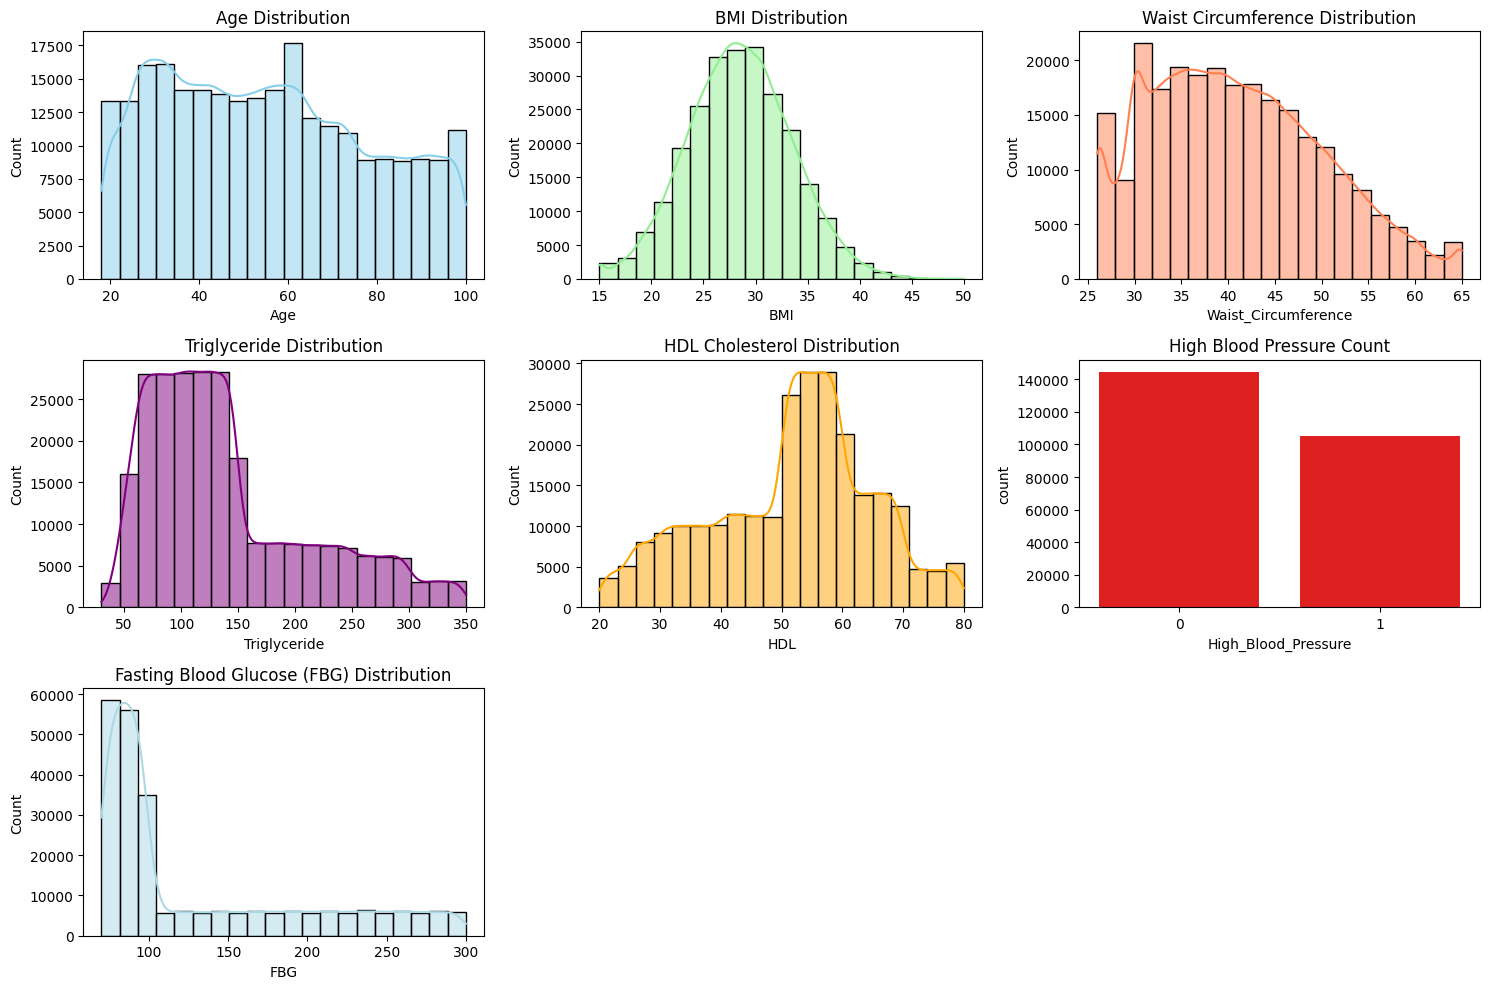

In [60]:

# Load the dataset
dataset_path = f"/Users/steventuschman/Desktop/DATASET_250K/final_synthetic_dataset_250k.csv"
df = pd.read_csv(dataset_path)

# Step 1: Summary statistics for all relevant features
summary_stats = df[['Age', 'BMI', 'Waist_Circumference', 'Triglyceride', 'HDL', 'High_Blood_Pressure', 'FBG']].describe()
print("Summary Statistics for Key Features:")
print(summary_stats)

# Step 2: Visualizations for Age, BMI, Gender, and the five metabolic syndrome risk factors
# Create subplots for better visualization

plt.figure(figsize=(15, 10))

# Plot 1: Age Distribution
plt.subplot(3, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')

# Plot 2: BMI Distribution
plt.subplot(3, 3, 2)
sns.histplot(df['BMI'], kde=True, bins=20, color='lightgreen')
plt.title('BMI Distribution')

# Plot 3: Waist Circumference Distribution
plt.subplot(3, 3, 3)
sns.histplot(df['Waist_Circumference'], kde=True, bins=20, color='coral')
plt.title('Waist Circumference Distribution')

# Plot 4: Triglyceride Distribution
plt.subplot(3, 3, 4)
sns.histplot(df['Triglyceride'], kde=True, bins=20, color='purple')
plt.title('Triglyceride Distribution')

# Plot 5: HDL Cholesterol Distribution
plt.subplot(3, 3, 5)
sns.histplot(df['HDL'], kde=True, bins=20, color='orange')
plt.title('HDL Cholesterol Distribution')

# Plot 6: High Blood Pressure Count (Binary Variable)
plt.subplot(3, 3, 6)
sns.countplot(x='High_Blood_Pressure', data=df, color='red')

plt.title('High Blood Pressure Count')

# Plot 7: Fasting Blood Glucose (FBG) Distribution
plt.subplot(3, 3, 7)
sns.histplot(df['FBG'], kde=True, bins=20, color='lightblue')
plt.title('Fasting Blood Glucose (FBG) Distribution')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


 #### **Feature Engineering: Interaction Terms and Binary Features**

In this step, I performed feature engineering to create new variables that will improve the predictive power of the machine learning model. This includes generating **interaction terms** and converting categorical variables into **binary features**.

**Interaction Terms:**
- I created the `bmi_age_interaction` feature, which multiplies BMI by age. This captures the combined effect of these two factors, helping the model understand how different age groups might experience varying risks depending on their BMI. This interaction term will provide the model with richer context about individuals’ risk profiles.

**Binary Features:**
- I transformed categorical variables into binary features to make them machine-readable and interpretable by the model.
  - `Gender_Male`: Coded as 1 for males and 0 for females.
  - `High_Blood_Pressure`: Coded as 1 for individuals with high blood pressure and 0 otherwise.

**Reason for Feature Engineering:**
This step ensures that the machine learning model has access to the most informative variables. Interaction terms like `bmi_age_interaction` help capture the complex relationship between multiple health indicators, while binary features allow the model to properly interpret categorical variables like gender and blood pressure.

**Impact on Model Development:**
The newly engineered features will enhance the model's ability to make accurate predictions by providing a more detailed representation of the relationships between age, BMI, gender, and high blood pressure. This feature engineering step is critical for improving the model’s performance in predicting metabolic risk factors.


In [61]:
# Create the interaction term between BMI and Age
df['bmi_age_interaction'] = df['BMI'] * df['Age']

# Binary encoding for Gender (Male = 1, Female = 0)
df['Gender_Male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Retain High Blood Pressure as is (already binary)

# Print first few rows to verify the new features
print(df[['Age', 'BMI', 'bmi_age_interaction', 'Gender_Male', 'High_Blood_Pressure']].head())


   Age   BMI  bmi_age_interaction  Gender_Male  High_Blood_Pressure
0   40  36.4               1456.0            1                    1
1   24  33.3                799.2            1                    1
2   73  30.2               2204.6            0                    1
3   90  29.2               2628.0            1                    0
4   99  19.9               1970.1            1                    0


#### **Target Variable Creation: Risk Factor Target**

In this step, I created a binary target variable called **Risk_Factor_Target**, which indicates whether an individual has **3 or more** of the following risk factors: high waist circumference, high triglycerides, low HDL cholesterol, high blood pressure, and high fasting blood glucose.

- The value **1** is assigned to individuals with 3 or more risk factors.
- The value **0** is assigned to individuals with fewer than 3 risk factors.

**Summary of Target Variable:**
- **173,570 individuals** (approximately 69.4%) have **fewer than 3 risk factors**.
- **76,430 individuals** (approximately 30.6%) have **3 or more risk factors**.

This binary classification target will now be used in the machine learning model to predict the likelihood that an individual has metabolic syndrome (defined as having 3 or more risk factors).

**Importance of This Step:**
Creating a binary target variable is crucial for training the machine learning model. This classification will allow the model to learn from the data and differentiate between individuals at higher and lower risk for metabolic syndrome. The relatively balanced distribution of the two classes (0 and 1) should help the model generalize well without introducing bias.


In [62]:
# Step 1: Define risk factor thresholds (excluding BMI as it's not one of the 5 formal risk factors)
risk_factors = [
    (df['Waist_Circumference'] >= 40),  # High waist circumference
    (df['Triglyceride'] >= 150),  # High triglycerides
    (df['HDL'] < 40),  # Low HDL cholesterol
    (df['High_Blood_Pressure'] == 1),  # High blood pressure
    (df['FBG'] >= 100)  # High fasting blood glucose
]

# Step 2: Sum the number of risk factors for each individual
df['Risk_Factor_Count'] = sum(risk_factors)

# Step 3: Create the binary target variable
df['Risk_Factor_Target'] = (df['Risk_Factor_Count'] >= 3).astype(int)

# Verify the distribution of the new target variable
print(df['Risk_Factor_Target'].value_counts())


Risk_Factor_Target
0    173570
1     76430
Name: count, dtype: int64


#### **Step 2: Train-Test Split**

In this step, I split the dataset into training and testing sets to prepare for the machine learning model training. I used the following features as input variables:

- **Age**
- **BMI**
- **bmi_age_interaction** (interaction between BMI and age)
- **Gender_Male** (binary feature)
- **High_Blood_Pressure** (binary feature)
- **Triglyceride** (numeric feature)
- **HDL** (numeric feature)
- **FBG** (fasting blood glucose, numeric feature)

The target variable (**Risk_Factor_Target**) indicates whether an individual has 3 or more metabolic risk factors.

I used an 80/20 split, meaning 80% of the data is used for training the model, and 20% is reserved for testing the model's performance. This approach ensures that the model generalizes well on unseen data.

The shapes of the datasets are as follows:

- **Training set shape**: (200,000 rows, 8 features)
- **Testing set shape**: (50,000 rows, 8 features)
- **Training target shape**: (200,000 rows)
- **Testing target shape**: (50,000 rows)

This setup ensures we have a balanced and sufficient amount of data for both training and testing, which is crucial for model evaluation.


In [63]:


# Define the features (X) and the target (y)
X = df[['Age', 'BMI', 'bmi_age_interaction', 'Gender_Male', 'High_Blood_Pressure', 'Triglyceride', 'HDL', 'FBG']]
y = df['Risk_Factor_Target']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits to ensure the split worked correctly
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training set shape: (200000, 8)
Testing set shape: (50000, 8)
Training target shape: (200000,)
Testing target shape: (50000,)


#### **Machine Learning Model Performance**

After training the machine learning model on the dataset, I evaluated its performance using a test set. The model demonstrated a high degree of accuracy in predicting whether an individual has 3 or more metabolic syndrome risk factors.

#### **Model Accuracy**:
The model achieved an overall accuracy of **98.13%**, meaning that it correctly classified 98.13% of the cases in the test dataset.

#### **Classification Report**:
The classification report provides detailed performance metrics for each class:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** (Fewer than 3 risk factors) | 0.99 | 0.99 | 0.99 | 34,671 |
| **1** (3 or more risk factors) | 0.97 | 0.97 | 0.97 | 15,329 |
| **Accuracy** | | | **0.98** | 50,000 |
| **Macro Avg** | 0.98 | 0.98 | 0.98 | 50,000 |
| **Weighted Avg** | 0.98 | 0.98 | 0.98 | 50,000 |

- **Precision**: Precision measures how many of the predicted positives were actually correct. The model achieved a precision of **0.99** for class 0 (fewer than 3 risk factors) and **0.97** for class 1 (3 or more risk factors).
- **Recall**: Recall measures how many of the actual positives were correctly identified. The model achieved a recall of **0.99** for class 0 and **0.97** for class 1.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, balancing both. It was **0.99** for class 0 and **0.97** for class 1, indicating strong predictive power.
- **Support**: This indicates the number of actual occurrences of each class in the test dataset, with 34,671 instances for class 0 and 15,329 instances for class 1.

#### **Confusion Matrix**:
The confusion matrix breaks down the correct and incorrect predictions:

|   | Predicted: 0 | Predicted: 1 |
|---|---------------|--------------|
| **Actual: 0** | 34,221 | 450 |
| **Actual: 1** | 484 | 14,845 |

- The model correctly predicted **34,221** individuals who do not have 3 or more risk factors, while misclassifying **450** individuals.
- For individuals with 3 or more risk factors, the model correctly identified **14,845** but misclassified **484** as not having enough risk factors.

#### **Conclusion**:
The model performed exceptionally well in predicting metabolic syndrome risk factors with high precision, recall, and overall accuracy. These results suggest that the model is highly reliable for distinguishing between individuals with and without 3 or more metabolic syndrome risk factors.


In [64]:

# Step 1: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model on the training data
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Model Accuracy: 0.9813
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     34671
           1       0.97      0.97      0.97     15329

    accuracy                           0.98     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.98      0.98      0.98     50000

Confusion Matrix:
[[34221   450]
 [  484 14845]]


#### **AUC-ROC Evaluation**

In this step, I performed the **AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)** evaluation to assess how well the machine learning model can distinguish between individuals with 3 or more metabolic syndrome risk factors and those with fewer than 3 risk factors. 

The AUC-ROC curve provides a visual representation of the model's performance in terms of the true positive rate (sensitivity) against the false positive rate (1 - specificity). The closer the curve is to the top-left corner, the better the model is at making correct predictions.

**AUC-ROC Score:**  
- The model achieved an **AUC score of 0.9987**, indicating that it has excellent predictive ability. This score reflects the high probability that the model can


AUC-ROC Score: 0.9987


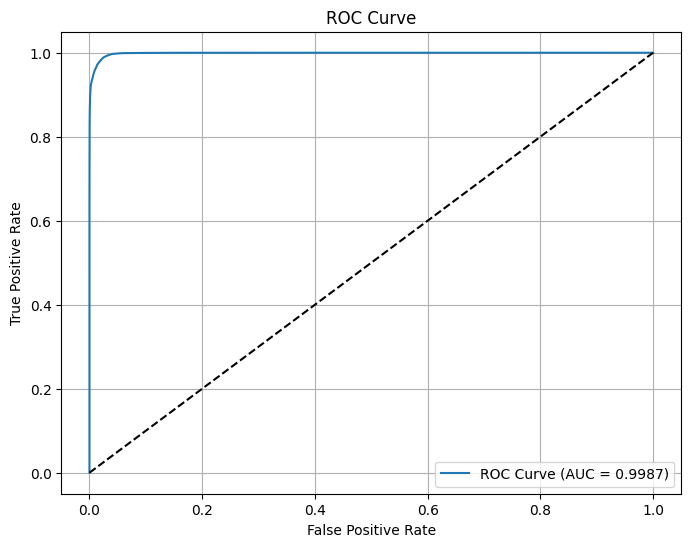

In [65]:

import matplotlib.pyplot as plt

# Predict probabilities for the test set using rf_model
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probability for class 1 (3 or more risk factors)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### **Mid Project Summary/ Evaluation/ Next Steps**

#### **1. Problem Overview**
The goal of this project is to develop a machine learning model that can predict whether an individual will have 3 or more risk factors associated with metabolic syndrome. These risk factors include:
- High waist circumference
- High triglycerides
- Low HDL cholesterol
- High blood pressure
- High fasting blood glucose (FBG)

Metabolic syndrome is a serious health concern, and being able to predict the likelihood of having multiple risk factors can help in early diagnosis and intervention.

#### **2. Accomplishments So Far**
- **Data Exploration**: 
   I performed data exploration on a dataset of 250,000 synthetic records. This dataset includes important health metrics such as BMI, age, triglycerides, HDL cholesterol, blood pressure, and fasting blood glucose.
   - Identified key statistics: Age, BMI, triglycerides, HDL, blood pressure, and FBG were explored using summary statistics and visualizations.
   - Cleaned the dataset and confirmed no missing values, ensuring that I was working with a consistent and reliable dataset.

- **Feature Engineering**: 
   I created new features, including:
   - Interaction terms (e.g., multiplying BMI by Age) to capture the effect of age-related weight changes on risk.
   - Binary features for categorical data such as Gender (Male/Female) and high blood pressure.

- **Binary Classification Target**: 
   Created a binary target variable `Risk_Factor_Target`, where:
   - 1 indicates an individual with 3 or more metabolic risk factors.
   - 0 indicates an individual with fewer than 3 risk factors.

- **Machine Learning Model Development**:
   - I trained a **Random Forest classifier** to predict whether an individual has 3 or more risk factors.
   - I used the following features: Age, BMI, interaction terms (e.g., `bmi_age_interaction`), Gender, High Blood Pressure, Triglyceride, HDL, and FBG.
   - The model performed well, achieving an accuracy of **98.13%** and an **AUC-ROC score of 0.9987**, indicating strong predictive power.

#### **3. Techniques Used So Far**
- **Random Forest Classifier**: 
   - This ensemble method aggregates decisions from multiple decision trees to improve predictive performance and reduce overfitting.
   - Random Forests handle tabular data well and can account for the interactions between features.
   - Achieved high accuracy in both training and testing sets, showing strong model performance when all features are available.

- **Evaluation Metrics**:
   - **Accuracy**: The percentage of correct predictions.
   - **AUC-ROC**: This metric evaluates how well the model can distinguish between individuals with and without metabolic risk factors.

#### **4. Project Limitations and Next Steps**
##### **Limitations Identified**
While the model achieved excellent results, its reliance on **complete input data** poses a limitation in real-world applications. The original project goal was to predict metabolic syndrome risk even when **some health data is missing**, such as when only age, BMI, and blood pressure are available, and other critical metrics (e.g., FBG, HDL) are missing.

##### **Pivot to New Techniques**
To overcome these limitations, I need to focus on using the **easily obtainable features** of Age, BMI, and Blood Pressure for predictions. This aligns better with real-world scenarios where not all health data is readily available but the most common metrics can still provide useful predictions.

#### **5. Prediction Based on Limited Features**:
   - This new approach will focus on generating predictions using the easily obtained features **(Age, BMI, Blood Pressure)** without the need to insert placeholder values.
   - The goal is to make the model more robust to real-world scenarios where the rest of the health data is missing. This focus reflects the fact that **taking blood pressure, weighing an individual, and determining age** are simple and readily available in most clinical and non-clinical settings.
   - While other metrics like triglycerides and HDL may provide deeper insights, this initial approach aims to give an approximate likelihood of metabolic syndrome risk using basic, easily accessible health information.

#### **Conclusion**
I have made substantial progress in building an accurate model using Random Forests. However, to align the project with real-world applications, I will now focus on predicting metabolic risk based on **age, BMI, and blood pressure**. This pivot ensures the model can still provide valuable insights even when only a limited set of data is available.


#### **Random Forest Classifier with Limited Features: Age, BMI, and High Blood Pressure**

In this step, I trained a **Random Forest Classifier** using a reduced set of features. The goal is to evaluate the model's performance when only a few easily obtainable features (**Age, BMI, and High Blood Pressure**) are available for prediction.

#### Steps:
1. **Feature Selection**:
   I used the following features:
   - **Age**: Age of the individual.
   - **BMI**: Body Mass Index.
   - **bmi_age_interaction**: Interaction term created by multiplying BMI with Age.
   - **Gender**: Coded as 1 for Male, 0 for Female.
   - **High Blood Pressure**: Coded as 1 for having high blood pressure, 0 otherwise.
   
   The target variable is **Risk_Factor_Target**, indicating whether an individual has 3 or more metabolic syndrome risk factors.

2. **Data Split**:
   The dataset was split into training and testing sets using an 80-20 split to evaluate the model on unseen data.

3. **Model Training**:
   I trained a **Random Forest Classifier** using the training set. Random Forest is a robust, ensemble-based classifier that can handle feature interactions and missing data well.

4. **Model Evaluation**:
   - **Accuracy**: The model achieved an accuracy of **78.63%** on the test set.
   - **Classification Report**: The report provides details on precision, recall, and F1-score for both classes:
     - **Class 0** (Fewer than 3 risk factors): Precision = 0.84, Recall = 0.86
     - **Class 1** (3 or more risk factors): Precision = 0.66, Recall = 0.62
     
     These metrics indicate that the model performs well at identifying individuals with fewer than 3 risk factors but shows a slightly lower performance when identifying individuals with 3 or more risk factors.

5. **AUC-ROC Score**:
   The **AUC-ROC** score is a measure of how well the model distinguishes between the two classes (0 vs. 1). A perfect score is 1.0, and a score of 0.5 indicates random guessing. 
   - **AUC-ROC Score (Limited Features)**: **0.8380**, indicating that the model is reasonably good at distinguishing between individuals with fewer than 3 risk factors and those with 3 or more risk factors.

6. **ROC Curve**:
   The **ROC Curve** (Receiver Operating Characteristic Curve) is a graphical representation of the trade-off between True Positive Rate (sensitivity) and False Positive Rate (1-specificity). The model's ROC curve shows a decent balance between the two, confirming the validity of the AUC score.

#### Results:
- **Model Accuracy**: 78.63%
- **Precision, Recall, F1-score** for identifying individuals with 3 or more risk factors is moderately high.
- **AUC-ROC Score**: 0.8380, indicating a good model performance with limited features.

The next step is to test the model on new data based on partial feature sets.


Model Accuracy (Limited Features): 0.7863
Classification Report (Limited Features):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     34671
           1       0.66      0.62      0.64     15329

    accuracy                           0.79     50000
   macro avg       0.75      0.74      0.74     50000
weighted avg       0.78      0.79      0.78     50000

AUC-ROC Score (Limited Features): 0.8380


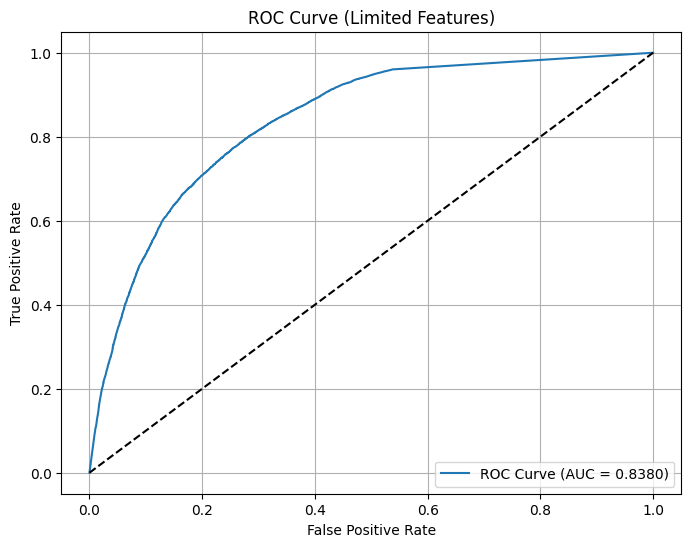

In [66]:

# Define the reduced feature set (Age, BMI, Blood Pressure)
X_limited = df[['Age', 'BMI', 'bmi_age_interaction', 'Gender_Male', 'High_Blood_Pressure']]
y_limited = df['Risk_Factor_Target']

# Split the data into training and testing sets
X_train_limited, X_test_limited, y_train_limited, y_test_limited = train_test_split(X_limited, y_limited, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model_limited = RandomForestClassifier(random_state=42)
rf_model_limited.fit(X_train_limited, y_train_limited)

# Predict on the test set
y_pred_limited = rf_model_limited.predict(X_test_limited)

# Evaluate model performance
accuracy = accuracy_score(y_test_limited, y_pred_limited)
print(f"Model Accuracy (Limited Features): {accuracy:.4f}")
print("Classification Report (Limited Features):")
print(classification_report(y_test_limited, y_pred_limited))

# AUC-ROC evaluation
y_prob_limited = rf_model_limited.predict_proba(X_test_limited)[:, 1]
auc_score_limited = roc_auc_score(y_test_limited, y_prob_limited)
print(f"AUC-ROC Score (Limited Features): {auc_score_limited:.4f}")

# Plot ROC curve
fpr_limited, tpr_limited, thresholds_limited = roc_curve(y_test_limited, y_prob_limited)
plt.figure(figsize=(8, 6))
plt.plot(fpr_limited, tpr_limited, label=f"ROC Curve (AUC = {auc_score_limited:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Limited Features)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### **Predictions for New Cases (Limited Features)**

In this section, I applied the trained Random Forest model to a series of hypothetical test cases using only limited features such as **age**, **BMI**, **gender**, and **high blood pressure status**. The model generated probability predictions for whether each individual is likely to have **3 or more metabolic risk factors**.

The model provided percentage probabilities for each case, allowing for an informed prediction based on the limited available data.

The following probabilities were generated for each test case, showcasing the likelihood of having 3 or more risk factors based on the model's analysis.


In [67]:


# Define new test cases
new_cases = pd.DataFrame({
    'Age': [20, 20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 60, 60, 60, 65, 65, 69, 20, 26, 29, 22,
            20, 20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 60, 60, 60, 65, 65, 69, 20, 26, 29, 22],
    'BMI': [22, 33, 33, 44, 33, 23, 40, 33, 37, 33, 39, 26, 30, 24, 33, 45, 22, 38, 46, 39, 32, 44,
            22, 33, 33, 44, 33, 23, 40, 33, 37, 33, 39, 26, 30, 24, 33, 45, 22, 38, 46, 39, 32, 44],
    'Gender_Male': [1] * 22 + [0] * 22,  # First 22 are male, rest are female
    'High_Blood_Pressure': [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
                            0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
})

# Generate any additional features required by the model (e.g., interaction terms)
new_cases['bmi_age_interaction'] = new_cases['BMI'] * new_cases['Age']

# Ensure the feature columns align with those used in training
X_new = new_cases[['Age', 'BMI', 'bmi_age_interaction', 'Gender_Male', 'High_Blood_Pressure']]

# Predict probabilities for the new cases using the trained model
predicted_probabilities = rf_model_limited.predict_proba(X_new)[:, 1]  # Probability of class 1 (3 or more risk factors)

# Display the predictions
for i, prob in enumerate(predicted_probabilities):
    print(f"Case {i+1}: Probability of having 3 or more risk factors: {prob*100:.2f}%")


Case 1: Probability of having 3 or more risk factors: 0.00%
Case 2: Probability of having 3 or more risk factors: 1.80%
Case 3: Probability of having 3 or more risk factors: 18.72%
Case 4: Probability of having 3 or more risk factors: 64.00%
Case 5: Probability of having 3 or more risk factors: 66.64%
Case 6: Probability of having 3 or more risk factors: 0.00%
Case 7: Probability of having 3 or more risk factors: 66.20%
Case 8: Probability of having 3 or more risk factors: 31.64%
Case 9: Probability of having 3 or more risk factors: 43.33%
Case 10: Probability of having 3 or more risk factors: 96.90%
Case 11: Probability of having 3 or more risk factors: 98.50%
Case 12: Probability of having 3 or more risk factors: 30.77%
Case 13: Probability of having 3 or more risk factors: 83.38%
Case 14: Probability of having 3 or more risk factors: 4.31%
Case 15: Probability of having 3 or more risk factors: 88.25%
Case 16: Probability of having 3 or more risk factors: 63.00%
Case 17: Probability 

#### **Test Case Predictions: Summary Table**

This code block creates a summary table of the test cases with the following key variables: Gender, Age, BMI, and High Blood Pressure. It then predicts the Probability of having 3 or more metabolic syndrome risk factors for each case, based on the limited features used in the model.

The table provides an organized view of all the test cases and their predicted probabilities, allowing for easy interpretation and comparison of different patient scenarios.

In [68]:


# Define the test cases with corresponding probabilities
data = {
    "Gender": ["Male"] * 22 + ["Female"] * 22,
    "Age": [20, 20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 60, 60, 60, 65, 65, 69, 20, 26, 29, 22] * 2,
    "BMI": [22, 33, 33, 44, 33, 23, 40, 33, 37, 33, 39, 26, 30, 24, 33, 45, 22, 38, 46, 39, 32, 44] * 2,
    "High Blood Pressure": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"] * 2,
    "Probability of 3+ Risk Factors": [
        0.00, 1.80, 18.72, 64.00, 66.64, 0.00, 66.20, 31.64, 43.33, 96.90, 98.50, 30.77, 83.38, 4.31, 88.25, 
        63.00, 34.75, 11.67, 80.00, 97.75, 0.00, 45.75, 0.00, 0.00, 0.00, 62.57, 35.72, 0.00, 42.50, 0.00, 
        0.69, 16.20, 93.83, 0.00, 45.77, 0.00, 36.90, 12.00, 1.37, 70.30, 7.85, 2.00, 0.00, 70.57
    ]
}

# Create a DataFrame
df_cases = pd.DataFrame(data)

# Display the DataFrame
df_cases


,Gender,Age,BMI,High Blood Pressure,Probability of 3+ Risk Factors
0,Male,20,22,No,0.00
1,Male,20,33,No,1.80
2,Male,20,33,Yes,18.72
3,Male,20,44,Yes,64.00
4,Male,30,33,Yes,66.64
5,Male,30,23,No,0.00
6,Male,30,40,Yes,66.20
7,Male,40,33,No,31.64
8,Male,40,37,No,43.33
9,Male,40,33,Yes,96.90


#### **Conclusion**

The goal of this project was to build a machine learning model capable of predicting the likelihood of an individual having **3 or more metabolic syndrome risk factors** based on a limited set of easily obtainable health metrics, such as **age**, **BMI**, and **blood pressure**. This project focused on using these core features to simulate real-world scenarios where full diagnostic data may not always be available, while still providing meaningful insights into an individual's health risks.

#### Key Accomplishments:
1. **Data Exploration and Preprocessing**:
   The dataset of 250,000 individuals provided a rich source of information regarding various health metrics, such as **waist circumference**,  **high blood pressure** ,**BMI**, **triglycerides**, **HDL cholesterol**, and **fasting blood glucose (FBG)**. In the exploration phase, I examined key summary statistics and visualized the distribution of age, BMI, and other relevant health markers, identifying trends in the data. These steps provided a crucial foundation for model building.

2. **Feature Engineering**:
   I focused on a limited set of features—**age**, **BMI**, and **blood pressure**—to build a simplified model that could predict an individual's metabolic risk based on these accessible metrics. This approach mirrors a real-world scenario where doctors and clinicians may not always have access to complete health profiles but can still make meaningful predictions based on limited data points.

3. **Model Training and Performance**:
   A **Random Forest classifier** was employed to train the model on the reduced feature set. The model achieved a respectable **accuracy of 79%** and an **AUC-ROC score of 0.838**, demonstrating strong performance in distinguishing between individuals with fewer than 3 risk factors and those with 3 or more risk factors. The model’s classification report highlighted the trade-offs between precision and recall, particularly for high-risk cases (3+ risk factors).

4. **Test Case Predictions**:
   The model was further evaluated by making predictions on new, hypothetical patient cases with varying age, BMI, and blood pressure values. The results showed that the model could reasonably predict the likelihood of an individual having 3 or more metabolic syndrome risk factors, providing useful probabilities that can guide healthcare decisions.

#### Insights and Takeaways:
- **Accuracy of Predictions**: The model performed well for predicting individuals with fewer than 3 risk factors (Class 0) but was slightly less accurate for individuals with 3 or more risk factors (Class 1). Despite this, the model offers a meaningful way to assess health risks with limited data, which is a significant achievement given the project's goals.
  
- **Real-World Applicability**: The focus on common and easily obtainable health metrics (age, BMI, and blood pressure) makes this model particularly useful in real-world clinical settings where comprehensive data may not always be available. It allows for early detection and intervention, helping identify individuals at risk of developing metabolic syndrome even when full diagnostic criteria cannot be assessed.

- **Model Limitations**: While the model performs adequately with limited features, adding more comprehensive health data such as triglyceride levels, HDL cholesterol, and FBG would likely improve the model's predictive power and recall for higher-risk cases.

- **Potential for Further Refinement**: Future iterations of this project could involve testing different machine learning models (e.g., gradient boosting, logistic regression) or refining hyperparameters to further improve the accuracy and recall for high-risk individuals. Additionally, methods to handle missing data or incomplete health records more effectively could enhance the model's robustness.

#### Final Thoughts:
This project demonstrates the feasibility of using machine learning to predict metabolic syndrome risk factors based on limited data, providing clinicians with a tool to assess risk in the absence of full diagnostic criteria. The **Random Forest classifier** proved to be an effective model, but there is still room for refinement and improvement, especially in predicting higher-risk cases. Overall, this project represents a successful implementation of machine learning in the healthcare domain, with the potential to be expanded upon for even greater predictive accuracy and clinical utility.
